<a href="https://colab.research.google.com/github/NorahAlShaikhMubarak/DiabetesPrediction/blob/master/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Description: This program predict diabetes based on data.

In [0]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
#Load the data
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('diabetes2.csv')
df.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


In [0]:
#Count the number of rows and columns in the data set
df.shape

(768, 9)

In [0]:
#Count the number of empty (NaN, NAN, na) values in each column
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [0]:
#Get a count of the number of False(0) or True(1) cells
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

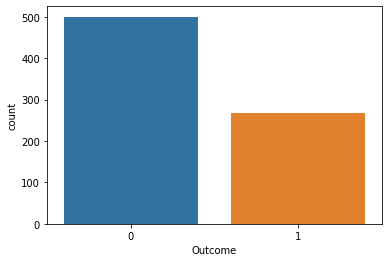

In [0]:
#Visualize the count
sns.countplot(df['Outcome'], label='count')

In [0]:
#Look at the types to see which columns need to be encoded
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

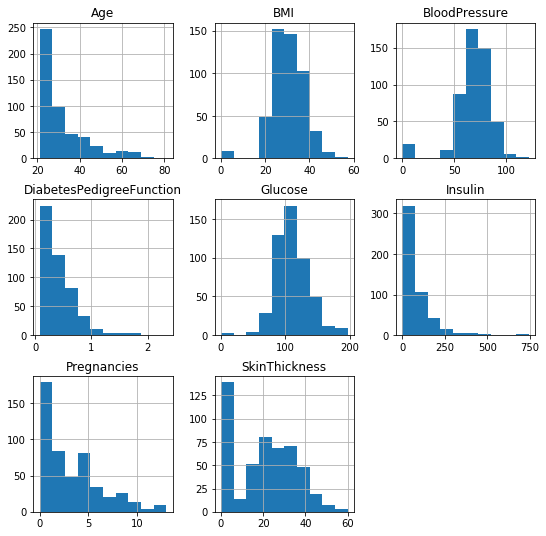

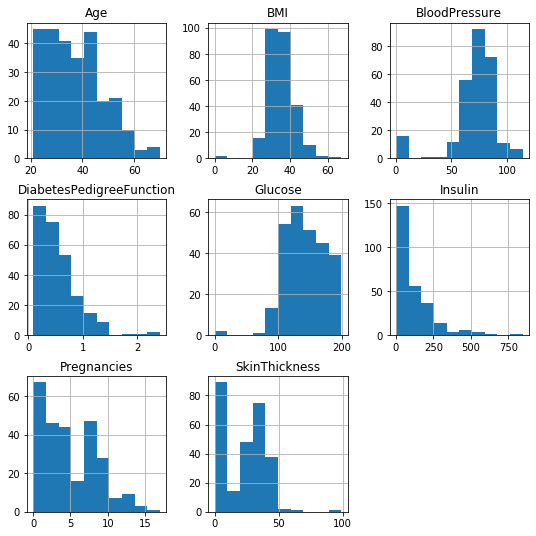

In [0]:
#Create a histogram
df.groupby('Outcome').hist(figsize=(9, 9))

In [0]:
#Get the correlation of the columns
df.iloc[:,0:9].corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


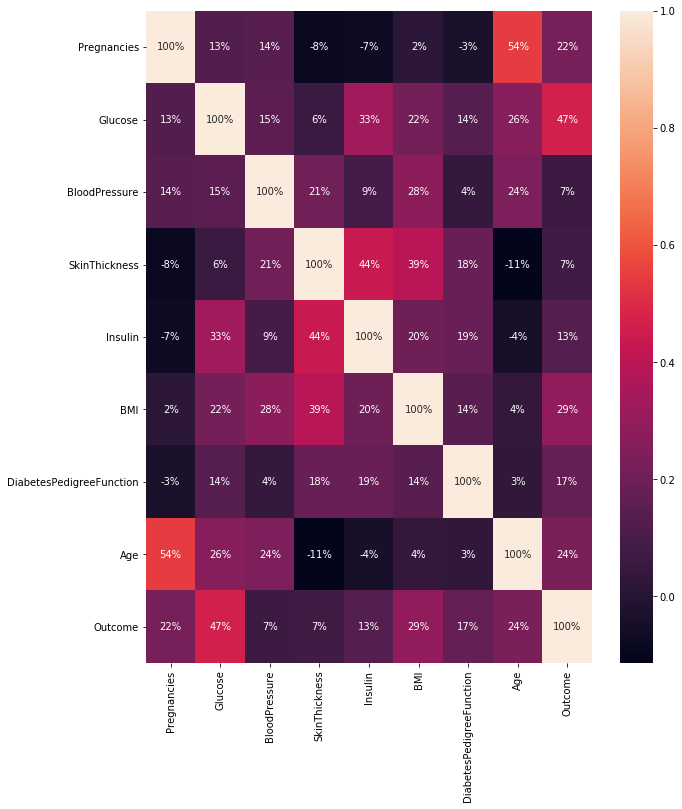

In [0]:
#Visualize the correlation
plt.figure(figsize=(10,12))
sns.heatmap(df.iloc[:,0:9].corr(), annot=True, fmt='.0%')

In [0]:
#Split the data set into independent (x) and dependent (y) data sets
x = df.iloc[:,0:8].values
y = df.iloc[:,8].values

In [0]:
#Split the data set into 75% training and 25% testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [0]:
#Scale the data (Feature Scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [0]:
#Create a function for models
def models(x_train, y_train):

  #Logistic Regression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(x_train, y_train)

  #Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(x_train, y_train)

  #Random Forest
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(x_train, y_train)

  #KNN
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier()
  knn.fit(x_train, y_train)

  #SVM
  from sklearn.svm import SVC
  svclassifier = SVC(kernel='linear')
  svclassifier.fit(x_train, y_train)

  #ANN
  from sklearn.neural_network import MLPClassifier
  mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
  mlp.fit(x_train, y_train)

  print('[0]Logistic Regression Training Accuracy: ', log.score(x_train, y_train))
  print('[1]Decision Tree Classifier Training Accuracy: ', tree.score(x_train, y_train))
  print('[2]Random Forest Classifier Training Accuracy: ', forest.score(x_train, y_train))
  print('[3]KNN Training Accuracy: ', knn.score(x_train, y_train))
  print('[4]SVM Training Accuracy: ', svclassifier.score(x_train, y_train))
  print('[5]ANN Training Accuracy: ', mlp.score(x_train, y_train))

  return log, tree, forest, knn, svclassifier, mlp


In [0]:
#Get all the models
model = models(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0]Logistic Regression Training Accuracy:  0.765625
[1]Decision Tree Classifier Training Accuracy:  1.0
[2]Random Forest Classifier Training Accuracy:  0.984375
[3]KNN Training Accuracy:  0.8055555555555556
[4]SVM Training Accuracy:  0.7638888888888888
[5]ANN Training Accuracy:  0.8767361111111112


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


<function matplotlib.pyplot.show>

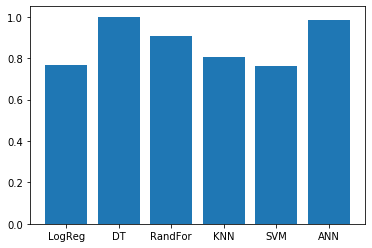

In [0]:
#Visualization of training accuracy
d1= ['LogReg', 'DT', 'RandFor', 'KNN', 'SVM', 'ANN']
d2 = [0.766, 1.0, 0.909, 0.806, 0.764, 0.984]   
plt.bar(d1, d2)
plt.show

In [0]:
#Test model accuracy on test data on confusion matrix
from sklearn.metrics import confusion_matrix
for i in range (len(model)):
  print('Model ', i)
  cm = confusion_matrix(y_test, model[i].predict(x_test))

  TP = cm[0][0]
  TN = cm[1][1]
  FN = cm[0][1]
  FP = cm[1][0]

  print(cm)
  print('Testing Accuracy = ', (TP + TN)/ (TP + TN + FN + FP))
  print() 

Model  0
[[115  15]
 [ 25  37]]
Testing Accuracy =  0.7916666666666666

Model  1
[[103  27]
 [ 19  43]]
Testing Accuracy =  0.7604166666666666

Model  2
[[109  21]
 [ 28  34]]
Testing Accuracy =  0.7447916666666666

Model  3
[[113  17]
 [ 22  40]]
Testing Accuracy =  0.796875

Model  4
[[117  13]
 [ 24  38]]
Testing Accuracy =  0.8072916666666666

Model  5
[[107  23]
 [ 25  37]]
Testing Accuracy =  0.75



<function matplotlib.pyplot.show>

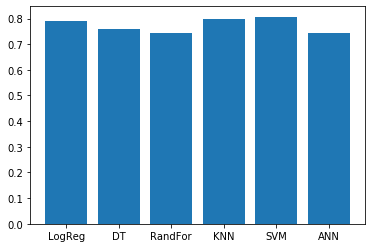

In [0]:
#Visualization of testing accuracy
d1= ['LogReg', 'DT', 'RandFor', 'KNN', 'SVM', 'ANN']
d2 = [0.792, 0.760, 0.745, 0.797, 0.807, 0.745]   
plt.bar(d1, d2)
plt.show

In [0]:
#Show another way to get metrics of the models
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
for i in range (len(model)):
  print('Model ', i)
  print(classification_report(y_test, model[i].predict(x_test)))
  print(accuracy_score(y_test, model[i].predict(x_test)))
  print()

Model  0
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       130
           1       0.71      0.60      0.65        62

    accuracy                           0.79       192
   macro avg       0.77      0.74      0.75       192
weighted avg       0.79      0.79      0.79       192

0.7916666666666666

Model  1
              precision    recall  f1-score   support

           0       0.84      0.79      0.82       130
           1       0.61      0.69      0.65        62

    accuracy                           0.76       192
   macro avg       0.73      0.74      0.73       192
weighted avg       0.77      0.76      0.76       192

0.7604166666666666

Model  2
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       130
           1       0.62      0.55      0.58        62

    accuracy                           0.74       192
   macro avg       0.71      0.69      0.70       192
weighte

In [0]:
#Print the prediction of SVM Classifier Model
pred = model[4].predict(x_test)
print(pred)
print()
print(y_test)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1
 0 1 0 0 0 0 0]

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0]


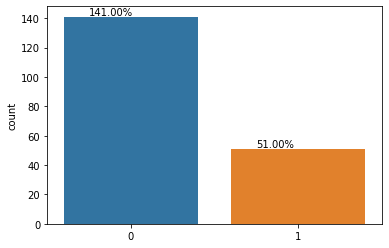

In [0]:
#The predicted result
p = sns.countplot(pred)
for px in p.patches:
        p.annotate('{:.2f}%'.format(px.get_height()), (px.get_x()+0.15, px.get_height()+1))

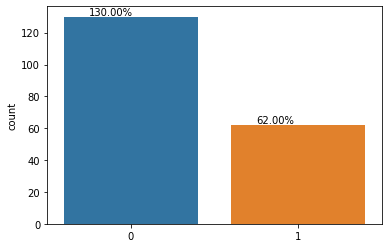

In [0]:
#The actual result
y = sns.countplot(y_test)
for yt in y.patches:
        y.annotate('{:.2f}%'.format(yt.get_height()), (yt.get_x()+0.15, yt.get_height()+1))

In [0]:
#console
v1 = input("Enter the number of Pregnancies: ")
v2 = input("Enter the number of Glucose: ")
v3 = input("Enter the number of BloodPressure: ")
v4 = input("Enter the number of SkinThickness: ")
v5 = input("Enter the number of Insulin: ")
v6 = input("Enter the number of BMI: ")
v7 = input("Enter the number of DiabetesPedigreeFunction: ")
v8 = input("Enter the number of Age: ")

test = [v1, v2, v3, v4, v5, v6, v7, v8]
testArr = np.reshape(test, (1, -1))
testpred = model[4].predict(testArr)
print(testpred)



Enter the number of Pregnancies: 0
Enter the number of Glucose: 100
Enter the number of BloodPressure: 101
Enter the number of SkinThickness: 7
Enter the number of Insulin: 100
Enter the number of BMI: 22.14
Enter the number of DiabetesPedigreeFunction: .1
Enter the number of Age: 26
[1]
